In [1]:
import numpy as np
import pandas as pd

In [2]:
MusicRatingsTrain = pd.read_csv("MusicRatingsTrain.csv", index_col = 0)
MusicRatingsValidationA = pd.read_csv("MusicRatingsValidationA.csv", index_col = 0)
MusicRatingsValidationB = pd.read_csv("MusicRatingsValidationB.csv", index_col = 0)
MusicRatingsTest = pd.read_csv("MusicRatingsTest.csv", index_col = 0)

In [3]:
# MusicRatingsTrain = pd.get_dummies(MusicRatingsTrain, columns=['genre', 'artist'])
# MusicRatingsValidationA = pd.get_dummies(MusicRatingsValidationA, columns=['genre', 'artist'])
# MusicRatingsValidationB = pd.get_dummies(MusicRatingsValidationB, columns=['genre', 'artist'])
# MusicRatingsTest = pd.get_dummies(MusicRatingsTest, columns=['genre', 'artist'])

In [4]:
MusicRatingsTrain = pd.get_dummies(MusicRatingsTrain, columns=['genre'])
MusicRatingsValidationA = pd.get_dummies(MusicRatingsValidationA, columns=['genre'])
MusicRatingsValidationB = pd.get_dummies(MusicRatingsValidationB, columns=['genre'])
MusicRatingsTest = pd.get_dummies(MusicRatingsTest, columns=['genre'])

In [5]:
MusicRatingsTrain

,songID,rating,songName,year,artist,genre_Country,genre_Electronic,genre_Folk,genre_Pop,genre_Rap,genre_RnB,genre_Rock
userID,,,,,,,,,,,,
778,242,1.494918,Billy Liar,2003,The Decemberists,0,0,0,0,0,0,1
1892,673,2.149164,The Big Gundown,2009,The Prodigy,0,1,0,0,0,0,0
2403,452,1.494918,Hummer,2007,Foals,0,0,0,0,0,0,1
1376,437,1.494918,October Song,2003,Amy Winehouse,0,0,0,0,0,1,0
1479,192,1.494918,Far Away (Album Version),2006,Nickelback,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,26,2.149164,Undo,2001,Bjork,0,0,0,0,0,0,1
2403,67,1.000000,Love,2007,Simian Mobile Disco,0,1,0,0,0,0,0
1678,478,1.000000,The Runner,2007,Kings Of Leon,0,0,0,0,0,0,1


In [6]:
# MusicRatingsTrain_dummy = pd.get_dummies(MusicRatingsTrain['artist'])
# MusicRatingsValidationA_dummy = pd.get_dummies(MusicRatingsValidationA['artist'])
# MusicRatingsValidationB_dummy = pd.get_dummies(MusicRatingsValidationB['artist'])
# MusicRatingsTest_dummy = pd.get_dummies(MusicRatingsTest['artist'])

In [7]:
# MusicRatingsTrain = MusicRatingsTrain_dummy.join(MusicRatingsTrain[['songID','rating','year']])
# MusicRatingsValidationA = MusicRatingsValidationA_dummy.join(MusicRatingsValidationA[['songID','rating','year', 'userID']], on=['userID'])
# MusicRatingsValidationB = MusicRatingsValidationB_dummy.join(MusicRatingsValidationB[['songID','rating','year', 'userID']], on=['userID'])
# MusicRatingsTest = MusicRatingsTest_dummy.join(MusicRatingsTest[['songID','rating','year', 'userID']], on=['userID'])

In [8]:
MusicRatingsTrain.sort_index()
MusicRatingsTrain_df = MusicRatingsTrain.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
MusicRatingsTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421 entries, 1 to 2421
Columns: 807 entries, 1 to 807
dtypes: float64(807)
memory usage: 14.9 MB


In [9]:
# Compute the summary statistics for the rating variable
mean_rating = MusicRatingsTrain["rating"].mean()
median_rating = MusicRatingsTrain["rating"].median()
std_rating = MusicRatingsTrain["rating"].std()
min_rating = MusicRatingsTrain["rating"].min()
max_rating = MusicRatingsTrain["rating"].max()

# Print the results
print("Mean rating: ", mean_rating)
print("Median rating: ", median_rating)
print("Standard deviation of rating: ", std_rating)
print("Minimum rating: ", min_rating)
print("Maximum rating: ", max_rating)

Mean rating:  1.3226311843072156
Median rating:  1.0
Standard deviation of rating:  0.46088622855102235
Minimum rating:  1.0
Maximum rating:  4.768655987487031


In [10]:
MusicRatingsValidationA.sort_index()
MusicRatingsValidationA_df = MusicRatingsValidationA.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
#movie_lens_valA_df.info()
valA_extra_columns = list(set(range(1,807+1)) - set(MusicRatingsValidationA_df.columns))
# print('# of missing columns: %s; # of missing musics: %s' % (2421-MusicRatingsValidationA_df.shape[1], len(valA_extra_columns)))
MusicRatingsValidationA_df[valA_extra_columns]=np.nan
MusicRatingsValidationA_df=MusicRatingsValidationA_df[MusicRatingsTrain_df.columns]
MusicRatingsValidationA_df = MusicRatingsTrain_df[[]].join(MusicRatingsValidationA_df, how='outer')
print(MusicRatingsValidationA_df.shape)

(2421, 807)


In [11]:
MusicRatingsValidationB.sort_index()
MusicRatingsValidationB_df = MusicRatingsValidationB.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
valB_extra_columns = list(set(range(1,807+1)) - set(MusicRatingsValidationB_df.columns))
MusicRatingsValidationB_df[valB_extra_columns]=np.nan
MusicRatingsValidationB_df = MusicRatingsValidationB_df[MusicRatingsTrain_df.columns]
MusicRatingsValidationB_df = MusicRatingsTrain_df[[]].join(MusicRatingsValidationB_df, how='outer')
print(MusicRatingsValidationB_df.shape)

(2421, 807)


In [12]:
MusicRatingsTest.sort_index()
MusicRatingsTest_df = MusicRatingsTest.pivot_table(index="userID", columns = "songID", values = "rating", dropna=False)
test_extra_columns = list(set(range(1,3706+1)) - set(MusicRatingsTest_df.columns))
MusicRatingsTest_df[test_extra_columns]=np.nan
MusicRatingsTest_df = MusicRatingsTest_df[MusicRatingsTrain_df.columns]
MusicRatingsTest_df = MusicRatingsTrain_df[[]].join(MusicRatingsTest_df, how='outer')
print(MusicRatingsTest_df.shape)

(2421, 807)


In [13]:
MusicRatingsTrain_mat = MusicRatingsTrain_df.to_numpy()
MusicRatingsValidationA_mat = MusicRatingsValidationA_df.to_numpy()
MusicRatingsValidationB_mat = MusicRatingsValidationB_df.to_numpy()
MusicRatingsTest_mat = MusicRatingsTest_df.to_numpy()

In [14]:
MusicRatingsValidationA_mask = ~np.isnan(MusicRatingsValidationA_mat)
print(np.sum(MusicRatingsValidationA_mask))
MusicRatingsValidationB_mask = ~np.isnan(MusicRatingsValidationB_mat)
print(np.sum(MusicRatingsValidationB_mask))
MusicRatingsTest_mask = ~np.isnan(MusicRatingsTest_mat)
print(np.sum(MusicRatingsTest_mask))

14470
14471
14471


## Basic Analysis (without using features)

In [15]:
from fancyimpute import BiScaler
from fancyimpute import SoftImpute
MusicRatings_biscaler = BiScaler(scale_rows=False, scale_columns=False, verbose=True)
MusicRatingsTrain_mat_centered = MusicRatings_biscaler.fit_transform(MusicRatingsTrain_mat)
# MusicRatings_soft_imputer = SoftImpute(max_rank=5, verbose=True)
# MusicRatings_centered_filled = MusicRatings_soft_imputer.fit_transform(MusicRatingsTrain_mat_centered)

[BiScaler] Initial log residual value = 8.636690
[BiScaler] Iter 1: log residual = -1.283248, log improvement ratio=9.919937
[BiScaler] Iter 2: log residual = -2.468379, log improvement ratio=1.185132
[BiScaler] Iter 3: log residual = -3.602839, log improvement ratio=1.134459
[BiScaler] Iter 4: log residual = -4.731547, log improvement ratio=1.128708
[BiScaler] Iter 5: log residual = -5.851961, log improvement ratio=1.120415
[BiScaler] Iter 6: log residual = -6.959236, log improvement ratio=1.107275
[BiScaler] Iter 7: log residual = -8.045993, log improvement ratio=1.086756
[BiScaler] Iter 8: log residual = -9.101878, log improvement ratio=1.055885
[BiScaler] Iter 9: log residual = -10.114070, log improvement ratio=1.012192
[BiScaler] Iter 10: log residual = -11.069605, log improvement ratio=0.955535
[BiScaler] Iter 11: log residual = -11.959489, log improvement ratio=0.889884
[BiScaler] Iter 12: log residual = -12.782528, log improvement ratio=0.823039
[BiScaler] Iter 13: log residual

In [16]:
# print(MusicRatingsTrain_df.info)

In [17]:
alpha = MusicRatings_biscaler.row_means
alpha

array([ 0.22859093,  0.36111895, -0.13391951, ...,  0.01472334,
       -0.1005265 , -0.07876552])

In [18]:
beta = MusicRatings_biscaler.column_means
beta

array([1.09934858, 1.29483349, 1.43291215, 1.16838423, 1.29287465,
       1.1271442 , 1.48428381, 1.3056472 , 1.35432017, 1.42747789,
       1.15711538, 1.22079888, 1.40913594, 1.26069266, 1.26438546,
       1.16010456, 1.58019505, 1.24011695, 1.49871002, 1.22908156,
       1.1599251 , 1.46087075, 1.22783733, 1.10581608, 1.43610721,
       2.14621426, 1.39473764, 1.13272049, 1.33856904, 1.22281094,
       1.10900468, 1.20062086, 1.18337202, 1.59557835, 1.4522586 ,
       1.26299262, 1.22262579, 1.13017954, 1.30100761, 1.11863992,
       1.36482753, 1.13229161, 1.2108941 , 1.27767823, 1.19208481,
       1.18273877, 1.19269274, 1.2011137 , 1.14426866, 1.17848228,
       1.27012365, 1.20829967, 1.18132093, 2.17693107, 1.7708668 ,
       1.19571077, 1.12229082, 1.15260986, 1.85440788, 1.1777396 ,
       1.41796965, 1.10216596, 1.08829429, 1.36259867, 1.32877959,
       1.26248184, 1.37999212, 1.14099949, 1.2244953 , 1.44994155,
       1.17138175, 1.22057993, 1.26233252, 1.17875799, 1.21407

In [34]:
# Calculate alpha and beta
# alpha = np.sum(MusicRatings_centered_filled, axis=1) / np.sum(~np.isnan(MusicRatings_centered_filled), axis=1)
# beta = np.sum(MusicRatings_centered_filled, axis=0) / np.sum(~np.isnan(MusicRatings_centered_filled), axis=0)
alpha = MusicRatings_biscaler.row_means
beta = MusicRatings_biscaler.column_means

user = pd.DataFrame(columns=['alpha'])
songs = pd.DataFrame(columns=['beta'])

# Sort users and songs by their alpha and beta values respectively
user['alpha'] = alpha
songs['beta'] = beta
users = user.sort_values('alpha', ascending=False)
songs = songs.sort_values('beta', ascending=False)

# index need to +1
print(users.head(3))
print(songs.head(3))

         alpha
1539  0.980499
837   0.822825
1568  0.810956
         beta
53   2.176931
25   2.146214
438  2.055549


In [32]:
MusicRatingsTrain[MusicRatingsTrain['songID']==54]

,songID,rating,songName,year,artist,genre_Country,genre_Electronic,genre_Folk,genre_Pop,genre_Rap,genre_RnB,genre_Rock
userID,,,,,,,,,,,,
685,54,1.000000,You're The One,1990,Dwight Yoakam,1,0,0,0,0,0,0
1515,54,2.484754,You're The One,1990,Dwight Yoakam,1,0,0,0,0,0,0
1291,54,2.149164,You're The One,1990,Dwight Yoakam,1,0,0,0,0,0,0
570,54,1.000000,You're The One,1990,Dwight Yoakam,1,0,0,0,0,0,0
274,54,3.173836,You're The One,1990,Dwight Yoakam,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1613,54,1.494918,You're The One,1990,Dwight Yoakam,1,0,0,0,0,0,0
2278,54,2.279344,You're The One,1990,Dwight Yoakam,1,0,0,0,0,0,0
1738,54,3.517876,You're The One,1990,Dwight Yoakam,1,0,0,0,0,0,0


In [31]:
MusicRatingsTrain[MusicRatingsTrain['songID']==26]

,songID,rating,songName,year,artist,genre_Country,genre_Electronic,genre_Folk,genre_Pop,genre_Rap,genre_RnB,genre_Rock
userID,,,,,,,,,,,,
440,26,3.326332,Undo,2001,Bjork,0,0,0,0,0,0,1
2087,26,1.000000,Undo,2001,Bjork,0,0,0,0,0,0,1
357,26,3.538574,Undo,2001,Bjork,0,0,0,0,0,0,1
1916,26,2.149164,Undo,2001,Bjork,0,0,0,0,0,0,1
1592,26,2.568853,Undo,2001,Bjork,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
659,26,2.149164,Undo,2001,Bjork,0,0,0,0,0,0,1
1491,26,2.712135,Undo,2001,Bjork,0,0,0,0,0,0,1
330,26,1.784426,Undo,2001,Bjork,0,0,0,0,0,0,1


In [30]:
MusicRatingsTrain[MusicRatingsTrain['songID']==439]

,songID,rating,songName,year,artist,genre_Country,genre_Electronic,genre_Folk,genre_Pop,genre_Rap,genre_RnB,genre_Rock
userID,,,,,,,,,,,,
1844,439,1.494918,Secrets,2009,OneRepublic,0,0,0,0,0,0,1
998,439,3.173836,Secrets,2009,OneRepublic,0,0,0,0,0,0,1
2337,439,2.279344,Secrets,2009,OneRepublic,0,0,0,0,0,0,1
878,439,1.494918,Secrets,2009,OneRepublic,0,0,0,0,0,0,1
235,439,2.484754,Secrets,2009,OneRepublic,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1900,439,2.149164,Secrets,2009,OneRepublic,0,0,0,0,0,0,1
1330,439,2.279344,Secrets,2009,OneRepublic,0,0,0,0,0,0,1
491,439,2.774262,Secrets,2009,OneRepublic,0,0,0,0,0,0,1


In [21]:
MusicRatings_filled = MusicRatings_biscaler.inverse_transform(MusicRatings_centered_filled)
MusicRatings_filled = np.clip(MusicRatings_filled, 1, 5)
MusicRatings_filled

array([[1.31751555, 1.32559433, 1.77067516, ..., 1.45351616, 1.19193561,
        1.26048074],
       [1.48635949, 1.98983574, 1.7533251 , ..., 1.7643118 , 1.50722042,
        1.44496876],
       [1.        , 1.20209875, 1.41574895, ..., 1.        , 1.00626523,
        1.03946881],
       ...,
       [1.04628835, 1.32742094, 1.44123562, ..., 1.45611338, 1.        ,
        1.24297738],
       [1.19634194, 1.        , 1.00796198, ..., 1.20470678, 1.13316103,
        1.        ],
       [1.        , 1.33639303, 1.49491787, ..., 1.18696337, 1.11712524,
        1.21133451]])

In [22]:
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

def masked_mse(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(masked_diff ** 2)

def OSR2(mse_model, mse_baseline):
    return 1 - mse_model/mse_baseline

In [23]:
MusicRatingsTest_mae = masked_mae(MusicRatingsTest_mat, MusicRatings_filled, MusicRatingsTest_mask)

print("MAE %s " % (MusicRatingsTest_mae/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

MusicRatingsTest_mse = masked_mse(MusicRatingsTest_mat, MusicRatings_filled, MusicRatingsTest_mask)

print("RMSE %s " % (np.sqrt(MusicRatingsTest_mse)/4))

baseline_pred = np.mean(MusicRatingsTrain)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsTest_mat, baseline_model, MusicRatingsTest_mask)

print("OSR2 %s " % OSR2(MusicRatingsTest_mse, baseline_mse))

MAE 0.07065022705529239 
RMSE 0.09658770329537217 


D:\katelyn\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


OSR2 0.9999999628175907 


D:\katelyn\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Cross Validation

In [24]:
MusicRatingsValidationA_mae_lst = []
for i in range(20):
    param_cv = i+1
    MusicRatings_soft_imputer_cv = SoftImpute(max_rank=param_cv, verbose=False)
    MusicRatings_centered_filled_cv = MusicRatings_soft_imputer_cv.fit_transform(MusicRatingsTrain_mat_centered)
    MusicRatings_filled_cv = MusicRatings_biscaler.inverse_transform(MusicRatings_centered_filled_cv)
    MusicRatings_filled_cv = np.clip(MusicRatings_filled_cv, 1, 5)
    MusicRatingsValidationA_mae_cv = masked_mae(MusicRatingsValidationA_mat, MusicRatings_filled_cv, MusicRatingsValidationA_mask)
    MusicRatingsValidationA_mae_lst.append(MusicRatingsValidationA_mae_cv)
    print('iter %s - Validation MAE %s' % (param_cv, MusicRatingsValidationA_mae_cv))

iter 1 - Validation MAE 0.2877419788582546
iter 2 - Validation MAE 0.2833865252209271
iter 3 - Validation MAE 0.2823681121531726
iter 4 - Validation MAE 0.2815871204245457
iter 5 - Validation MAE 0.2809104164958192
iter 6 - Validation MAE 0.28116457642552345
iter 7 - Validation MAE 0.28294753134495515
iter 8 - Validation MAE 0.2843476082785188
iter 9 - Validation MAE 0.2839987810829701
iter 10 - Validation MAE 0.2867130425722425
iter 11 - Validation MAE 0.28719980293628267
iter 12 - Validation MAE 0.28992748371772864
iter 13 - Validation MAE 0.28904128670968726
iter 14 - Validation MAE 0.2911063185717325
iter 15 - Validation MAE 0.292362323861433
iter 16 - Validation MAE 0.2926299084257148
iter 17 - Validation MAE 0.2969183796262383
iter 18 - Validation MAE 0.2954975511802018
iter 19 - Validation MAE 0.29748186092626056
iter 20 - Validation MAE 0.30212283458748646


In [25]:
MusicRatingsTrain_mat_centered

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,  0.33388331,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ..., -0.2044454 ,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
        -0.21459108,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,  0.14077125, ...,         nan,
                nan,         nan]])

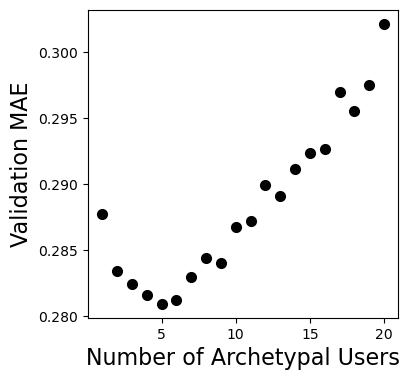

In [26]:
import matplotlib.pyplot as plt
x = range(1,21)
y = MusicRatingsValidationA_mae_lst
plt.figure(figsize=(4, 4))
plt.scatter(x, y, linewidth=2, color='black')
plt.xlabel('Number of Archetypal Users', fontsize=16)
plt.ylabel('Validation MAE', fontsize=16)
plt.show()

## Model Blending/Stacking

Collaborative Filtering

In [27]:
MusicRatings_soft_imputer = SoftImpute(max_rank=10, verbose=False) #use the best 
MusicRatings_centered_filled = MusicRatings_soft_imputer.fit_transform(MusicRatingsTrain_mat_centered)
MusicRatings_filled_matrix = MusicRatings_biscaler.inverse_transform(MusicRatings_centered_filled)
MusicRatings_filled_matrix = np.clip(MusicRatings_filled_matrix, 1, 5)

In [28]:
val_mae_cf = masked_mae(MusicRatingsValidationB_mat, MusicRatings_filled_matrix, MusicRatingsValidationB_mask)
print("MAE %s " % (val_mae_cf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_cf = masked_mse(MusicRatingsValidationB_mat, MusicRatings_filled_matrix, MusicRatingsValidationB_mask)
print("RMSE %s " % (np.sqrt(val_mse_cf)/4))

baseline_pred = np.mean(MusicRatingsTrain_df)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsValidationB_mat, baseline_model, MusicRatingsValidationB_mask)

print("OSR2 %s " % OSR2(val_mse_cf, baseline_mse))

MAE 0.0715496668403931 
RMSE 0.09865849720645252 
OSR2 0.25900813428265923 


D:\katelyn\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [29]:
val_pred_cf = MusicRatings_filled_matrix[MusicRatingsValidationB_mask]

blend_valB_df = MusicRatingsValidationB.reset_index()[['userID','songID','rating']]

blend_valB_df['val_pred_cf']=val_pred_cf
blend_valB_df

,userID,songID,rating,val_pred_cf
0,2025,425,1.784426,1.716686
1,2318,400,1.000000,1.263942
2,2009,792,2.568853,1.713038
3,1280,584,1.000000,1.931435
4,146,534,1.000000,1.510468
...,...,...,...,...
14466,1549,332,1.000000,1.089889
14467,979,667,1.000000,1.161344
14468,1737,594,1.000000,1.601405
14469,445,533,2.149164,1.192191


Linear Regression

In [30]:
# Some extra data preprocessing, converting numbers to categorical variables
MusicRatingsTrain['year'] = MusicRatingsTrain.year.astype('category')
# MusicRatingsTrain['AgeRange'] = MusicRatingsTrain.AgeRange.astype('category')
MusicRatingsValidationA['year'] = MusicRatingsValidationA.year.astype('category')
# MusicRatingsValidationA['AgeRange'] = MusicRatingsValidationA.AgeRange.astype('category')
MusicRatingsTest['year'] = MusicRatingsTest.year.astype('category')
# MusicRatingsTest['AgeRange'] = MusicRatingsTest.AgeRange.astype('category')
MusicRatingsTest

,songID,rating,songName,year,artist,genre_Country,genre_Electronic,genre_Folk,genre_Pop,genre_Rap,genre_RnB,genre_Rock
userID,,,,,,,,,,,,
501,736,1.000000,I Gotta Feeling,2009,Black Eyed Peas,0,0,0,1,0,0,0
1162,753,1.494918,Bitter Sweet Symphony,1997,The Verve,0,0,0,1,0,0,0
898,5,1.000000,Full Circle,2008,Miley Cyrus,0,0,0,1,0,0,0
472,752,1.784426,The Fear,2008,Lily Allen,0,0,0,1,0,0,0
1307,630,1.000000,Marry Me,2009,Train,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53,773,1.494918,Let's Dance,2007,Miley Cyrus,0,0,0,1,0,0,0
2218,424,1.494918,Colourful,2006,Skream,0,1,0,0,0,0,0
782,91,1.000000,Let's Take A Ride,2002,Justin Timberlake,0,0,0,1,0,0,0


In [31]:
MusicRatingsValidationB

,songID,rating,songName,year,artist,genre_Country,genre_Electronic,genre_Folk,genre_Pop,genre_Rap,genre_RnB,genre_Rock
userID,,,,,,,,,,,,
2025,425,1.784426,Year 3000,2006,Jonas Brothers,0,0,0,1,0,0,0
2318,400,1.000000,The Concubine,2009,Beirut,0,0,1,0,0,0,0
2009,792,2.568853,Favorite Girl,2009,Justin Bieber,0,0,0,1,0,0,0
1280,584,1.000000,Bubble Toes,2000,Jack Johnson,0,0,0,0,0,0,1
146,534,1.000000,All These Things That I've Done,2004,The Killers,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1549,332,1.000000,How You Remind Me,2000,Nickelback,0,0,0,0,0,0,1
979,667,1.000000,Lava Lava,2007,Boys Noize,0,1,0,0,0,0,0
1737,594,1.000000,My Love,2009,the bird and the bee,0,0,0,0,0,0,1


In [32]:
# Some extra data preprocessing, converting numbers to categorical variables
MusicRatingsTrain = MusicRatingsTrain.drop(['songName','artist'], axis=1)
MusicRatingsValidationA = MusicRatingsValidationA.drop(['songName', 'artist'], axis=1)
MusicRatingsValidationB = MusicRatingsValidationB.drop(['songName', 'artist'], axis=1)
MusicRatingsTest = MusicRatingsTest.drop(['songName', 'artist'], axis=1)
MusicRatingsValidationB

,songID,rating,year,genre_Country,genre_Electronic,genre_Folk,genre_Pop,genre_Rap,genre_RnB,genre_Rock
userID,,,,,,,,,,
2025,425,1.784426,2006,0,0,0,1,0,0,0
2318,400,1.000000,2009,0,0,1,0,0,0,0
2009,792,2.568853,2009,0,0,0,1,0,0,0
1280,584,1.000000,2000,0,0,0,0,0,0,1
146,534,1.000000,2004,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1549,332,1.000000,2000,0,0,0,0,0,0,1
979,667,1.000000,2007,0,1,0,0,0,0,0
1737,594,1.000000,2009,0,0,0,0,0,0,1


In [33]:
depedent_var = MusicRatingsTrain.columns.difference(["rating","userID","songID"])
print(len(depedent_var))
depedent_var = "+".join(depedent_var)
depedent_var

8


'genre_Country+genre_Electronic+genre_Folk+genre_Pop+genre_Rap+genre_RnB+genre_Rock+year'

In [34]:
import statsmodels.formula.api as smf
my_formula = "rating ~" + depedent_var
MusicRatings_ols = smf.ols(formula=my_formula, data=MusicRatingsTrain)
res = MusicRatings_ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     262.4
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:30:18   Log-Likelihood:            -1.5425e+05
No. Observations:              245997   AIC:                         3.086e+05
Df Residuals:                  245963   BIC:                         3.089e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.651e+11   2.19e+11  

In [35]:
MusicRatingsValidationB.reset_index(drop=True, inplace=True)
val_pred_ols = res.predict(MusicRatingsValidationB)
blend_valB_df['val_pred_ols']=val_pred_ols
blend_valB_df

,userID,songID,rating,val_pred_cf,val_pred_ols
0,2025,425,1.784426,1.716686,1.324860
1,2318,400,1.000000,1.263942,1.418427
2,2009,792,2.568853,1.713038,1.384064
3,1280,584,1.000000,1.931435,1.314575
4,146,534,1.000000,1.510468,1.206940
...,...,...,...,...,...
14466,1549,332,1.000000,1.089889,1.314575
14467,979,667,1.000000,1.161344,1.381439
14468,1737,594,1.000000,1.601405,1.348114
14469,445,533,2.149164,1.192191,1.290833


In [36]:
# MusicRatingsValidationB_new_mat = MusicRatingsValidationB_new.to_numpy()
# MusicRatingsValidationB_new_mask = ~np.isnan(MusicRatingsValidationB_new_mat)

In [37]:
val_mae_ols = np.mean(np.abs(MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_ols))
print("MAE %s " % (val_mae_ols/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_ols = np.mean((MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_ols)**2)
print("RMSE %s " % (np.sqrt(val_mse_ols)/4))

print("OSR2 %s " % OSR2(val_mse_ols, baseline_mse))

MAE 0.09511715266706726 
RMSE 0.11680842279644714 
OSR2 -0.038706306826838066 


Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

# MusicRatingsTrain_rest_index = MusicRatingsTrain.reset_index()
X_train = MusicRatingsTrain.drop(columns = ["songID","rating"])
y_train = MusicRatingsTrain["rating"]
rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.3min finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [39]:
# MusicRatingsValidationB.reset_index(drop=True, inplace=True)
# MusicRatingsValidationB_rest_index = MusicRatingsValidationB.reset_index()
# MusicRatingsValidationB = pd.get_dummies(MusicRatingsValidationB)
val_pred_rf=rf.predict(MusicRatingsValidationB.drop(columns = ["songID","rating"]))

blend_valB_df['val_pred_rf']=val_pred_rf
blend_valB_df

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.3s finished


,userID,songID,rating,val_pred_cf,val_pred_ols,val_pred_rf
0,2025,425,1.784426,1.716686,1.324860,1.278080
1,2318,400,1.000000,1.263942,1.418427,1.153099
2,2009,792,2.568853,1.713038,1.384064,1.381133
3,1280,584,1.000000,1.931435,1.314575,1.307490
4,146,534,1.000000,1.510468,1.206940,1.219167
...,...,...,...,...,...,...
14466,1549,332,1.000000,1.089889,1.314575,1.307490
14467,979,667,1.000000,1.161344,1.381439,1.399646
14468,1737,594,1.000000,1.601405,1.348114,1.358524
14469,445,533,2.149164,1.192191,1.290833,1.292382


In [40]:
val_mae_rf = np.mean(np.abs(MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_rf))
print("MAE %s " % (val_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_rf = np.mean((MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_rf)**2)
print("RMSE %s " % (np.sqrt(val_mse_rf)/4))

print("OSR2 %s " % OSR2(val_mse_rf, baseline_mse))

MAE 0.09525072158902206 
RMSE 0.11767366245525483 
OSR2 -0.05415140004340624 


Combine three models using OLS

In [41]:
blending_ols = smf.ols(formula='rating ~ val_pred_cf+val_pred_ols+val_pred_rf -1', data=blend_valB_df)
blending_res = blending_ols.fit()
print(blending_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                          4.221e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                        0.00
Time:                        12:32:42   Log-Likelihood:                         -8896.8
No. Observations:               14471   AIC:                                  1.780e+04
Df Residuals:                   14468   BIC:                                  1.782e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [42]:
val_pred_blended =blending_res.predict(blend_valB_df)
blend_valB_df['pred_blended']= val_pred_blended

blend_valB_df

,userID,songID,rating,val_pred_cf,val_pred_ols,val_pred_rf,pred_blended
0,2025,425,1.784426,1.716686,1.324860,1.278080,1.277344
1,2318,400,1.000000,1.263942,1.418427,1.153099,1.138335
2,2009,792,2.568853,1.713038,1.384064,1.381133,1.381603
3,1280,584,1.000000,1.931435,1.314575,1.307490,1.310374
4,146,534,1.000000,1.510468,1.206940,1.219167,1.220341
...,...,...,...,...,...,...,...
14466,1549,332,1.000000,1.089889,1.314575,1.307490,1.303136
14467,979,667,1.000000,1.161344,1.381439,1.399646,1.396285
14468,1737,594,1.000000,1.601405,1.348114,1.358524,1.358961
14469,445,533,2.149164,1.192191,1.290833,1.292382,1.289513


In [43]:
val_mae_blended = np.mean(np.abs(MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_blended))
print("MAE %s " % (val_mae_blended/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_blended = np.mean((MusicRatingsValidationB_mat[MusicRatingsValidationB_mask] - val_pred_blended)**2)
print("RMSE %s " % (np.sqrt(val_mse_blended)/4))

print("OSR2 %s " % OSR2(val_mse_blended, baseline_mse))

MAE 0.0948784943659244 
RMSE 0.11731018592264836 
OSR2 -0.047649222299275706 


Test set performance

In [44]:
baseline_pred = np.mean(MusicRatingsTrain_df)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsTest_mat, baseline_model, MusicRatingsTest_mask)
baseline_mse

D:\katelyn\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.2166807682666739

In [45]:
test_mae_cf = masked_mae(MusicRatingsTest_mat, MusicRatings_filled_matrix, MusicRatingsTest_mask)
print("Test_cf MAE  %s " % (val_mae_cf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_cf = masked_mse(MusicRatingsTest_mat, MusicRatings_filled_matrix, MusicRatingsTest_mask)
print("Test_cf RMSE %s " % (np.sqrt(val_mse_cf)/4))

baseline_pred = np.mean(MusicRatingsTrain_df)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(MusicRatingsTest_mat, baseline_model, MusicRatingsTest_mask)

print("Test_cf OSR2 %s " % OSR2(val_mse_cf, baseline_mse))

Test_cf MAE  0.0715496668403931 
Test_cf RMSE 0.09865849720645252 
Test_cf OSR2 0.281265308488745 


D:\katelyn\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [46]:
test_pred_cf = MusicRatings_filled_matrix[MusicRatingsTest_mask]

blend_test_df = MusicRatingsTest.reset_index()[['userID','songID','rating']]

blend_test_df['test_pred_cf']=test_pred_cf
blend_test_df

,userID,songID,rating,test_pred_cf
0,501,736,1.000000,1.785210
1,1162,753,1.494918,1.670418
2,898,5,1.000000,1.987201
3,472,752,1.784426,1.911286
4,1307,630,1.000000,1.785337
...,...,...,...,...
14466,53,773,1.494918,1.055832
14467,2218,424,1.494918,1.125692
14468,782,91,1.000000,1.000000
14469,869,621,1.000000,1.187901


In [47]:
MusicRatingsTest.reset_index(drop=True, inplace=True)
test_pred_ols = res.predict(MusicRatingsTest)
blend_test_df['test_pred_ols']=test_pred_ols
blend_test_df

,userID,songID,rating,test_pred_cf,test_pred_ols
0,501,736,1.000000,1.785210,1.384064
1,1162,753,1.494918,1.670418,1.413422
2,898,5,1.000000,1.987201,1.317871
3,472,752,1.784426,1.911286,1.317871
4,1307,630,1.000000,1.785337,1.384064
...,...,...,...,...,...
14466,53,773,1.494918,1.055832,1.323364
14467,2218,424,1.494918,1.125692,1.382949
14468,782,91,1.000000,1.000000,1.368347
14469,869,621,1.000000,1.187901,1.288910


In [48]:
test_mae_ols = np.mean(np.abs(MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_ols))
print("Test_ols MAE  %s " % (test_mae_ols/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_ols = np.mean((MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_ols)**2)
print("Test_ols RMSE %s " % (np.sqrt(test_mse_ols)/4))

print("Test_ols OSR2 %s " % OSR2(test_mse_ols, baseline_mse))

Test_ols MAE  0.09548973170955878 
Test_ols RMSE 0.11797669915578514 
Test_ols OSR2 -0.027760915195930602 


In [49]:
dtm = pd.concat([MusicRatingsTrain, MusicRatingsTest], join = 'inner')
MusicRatingsTrain_new = dtm.iloc[0:MusicRatingsTrain.shape[0]]
MusicRatingsTest_new = dtm.iloc[MusicRatingsTest.shape[0]:]

In [50]:
MusicRatingsTest_new.reset_index(drop=True, inplace=True)
test_pred_rf=rf.predict(MusicRatingsTest.drop(columns = ["songID","rating"]))

blend_test_df['test_pred_rf']=test_pred_rf
blend_test_df

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished


,userID,songID,rating,test_pred_cf,test_pred_ols,test_pred_rf
0,501,736,1.000000,1.785210,1.384064,1.381133
1,1162,753,1.494918,1.670418,1.413422,1.439564
2,898,5,1.000000,1.987201,1.317871,1.313881
3,472,752,1.784426,1.911286,1.317871,1.313881
4,1307,630,1.000000,1.785337,1.384064,1.381133
...,...,...,...,...,...,...
14466,53,773,1.494918,1.055832,1.323364,1.373973
14467,2218,424,1.494918,1.125692,1.382949,1.445125
14468,782,91,1.000000,1.000000,1.368347,1.250739
14469,869,621,1.000000,1.187901,1.288910,1.266330


In [51]:
test_mae_rf = np.mean(np.abs(MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_rf))
print("Test_rf MAE  %s " % (test_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_rf = np.mean((MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_rf)**2)
print("Test_rf RMSE %s " % (np.sqrt(test_mse_rf)/4))

print("Test_rf OSR2 %s " % OSR2(test_mse_rf, baseline_mse))

Test_rf MAE  0.09563490415000771 
Test_rf RMSE 0.11872733173852723 
Test_rf OSR2 -0.04088088034849946 


In [52]:
blend_test_temp = blend_test_df.rename(columns={"test_pred_cf":"val_pred_cf","test_pred_ols":"val_pred_ols","test_pred_rf":"val_pred_rf" })
test_pred_blended =blending_res.predict(blend_test_temp)
blend_test_df['pred_blended']= test_pred_blended
blend_test_df

,userID,songID,rating,test_pred_cf,test_pred_ols,test_pred_rf,pred_blended
0,501,736,1.000000,1.785210,1.384064,1.381133,1.382224
1,1162,753,1.494918,1.670418,1.413422,1.439564,1.440588
2,898,5,1.000000,1.987201,1.317871,1.313881,1.317341
3,472,752,1.784426,1.911286,1.317871,1.313881,1.316688
4,1307,630,1.000000,1.785337,1.384064,1.381133,1.382225
...,...,...,...,...,...,...,...
14466,53,773,1.494918,1.055832,1.323364,1.373973,1.371658
14467,2218,424,1.494918,1.125692,1.382949,1.445125,1.443288
14468,782,91,1.000000,1.000000,1.368347,1.250739,1.240420
14469,869,621,1.000000,1.187901,1.288910,1.266330,1.262430


In [53]:
test_mae_blended = np.mean(np.abs(MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_blended))
print("Test_blended MAE  %s " % (test_mae_blended/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_blended = np.mean((MusicRatingsTest_mat[MusicRatingsTest_mask] - test_pred_blended)**2)
print("Test_blended RMSE %s " % (np.sqrt(test_mse_blended)/4))

print("Test_blended OSR2 %s " % OSR2(test_mse_blended, baseline_mse))

Test_blended MAE  0.09525916080226997 
Test_blended RMSE 0.11836314175321226 
Test_blended OSR2 -0.03450497708767952 
